**Tasks:**
1. Convert the images into digital text
    - Use alphabets_28*28.csv to perform text recognition from images
    - Test the observations
    - Simple enough: Apply some basic CNN with letters as vocab. Will help identify the letters given the pixels. (Previously done TL project)
2. Perform Sentiment analysis
    - sentiment_analysis_dataset.csv to be used for analysis.
    - Compulsory: Naive bayes: Create vocab, identify the frequencies of the words. Use the frequencies to determine sentiment.
    - If time permits, attempt LSTMs/embeddings
3. Converting images to text, then performing sentiment analysis:
    - Split image into letters. Refer the previously done TL project to perform this image splitting
    - Use model 1 to identify the letters in the grids, and convert into sentence. If the letters are predicted incorrectly, then it will give words that don't exist in vocab for model 2 (If using naive bayes). So the first model must be quite good.
    - Use the text to perform sentiment analysis using model 2.

# Task 1

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch.utils.data import TensorDataset, DataLoader

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("Dataset/alphabets_28x28.csv")

df.shape

/tmp/ipykernel_18715/2646970854.py:1: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset/alphabets_28x28.csv")


(372451, 785)

In [3]:
df.head(10)

,label,row 1 col 1 pixel,row 1 col 2 pixel,row 1 col 3 pixel,row 1 col 4 pixel,row 1 col 5 pixel,row 1 col 6 pixel,row 1 col 7 pixel,row 1 col 8 pixel,row 1 col 9 pixel,...,row 28 col 19 pixel,row 28 col 20 pixel,row 28 col 21 pixel,row 28 col 22 pixel,row 28 col 23 pixel,row 28 col 24 pixel,row 28 col 25 pixel,row 28 col 26 pixel,row 28 col 27 pixel,row 28 col 28 pixel
0,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372451 entries, 0 to 372450
Columns: 785 entries, label to row 28 col 28 pixel
dtypes: float64(780), object(5)
memory usage: 2.2+ GB


In [5]:
df.describe()

,row 1 col 5 pixel,row 1 col 6 pixel,row 1 col 7 pixel,row 1 col 8 pixel,row 1 col 9 pixel,row 1 col 10 pixel,row 1 col 11 pixel,row 1 col 12 pixel,row 1 col 13 pixel,row 1 col 14 pixel,...,row 28 col 19 pixel,row 28 col 20 pixel,row 28 col 21 pixel,row 28 col 22 pixel,row 28 col 23 pixel,row 28 col 24 pixel,row 28 col 25 pixel,row 28 col 26 pixel,row 28 col 27 pixel,row 28 col 28 pixel
count,371391.0,371391.0,371391.0,371391.0,371391.0,371391.0,371391.0,371391.0,371391.0,371391.0,...,371391.000000,371391.000000,371391.000000,371391.000000,371391.000000,371391.000000,371391.000000,371391.000000,371391.000000,371391.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001621,0.001597,0.001120,0.000932,0.000687,0.000598,0.000619,0.000692,0.000240,0.000011
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.491488,0.518034,0.421933,0.419777,0.386116,0.320276,0.209239,0.335705,0.135044,0.006564
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [6]:
%%time

# Converting the first four columns into float:
def extract_number(value):
    value = str(value)
    
    pattern = r'[^\d.]'
    
    # Use re.sub to replace all non-numeric and non-decimal characters with an empty string
    result = re.sub(pattern, '', value)
    
    return float(result) if result else None

df["row 1 col 1 pixel"] = df["row 1 col 1 pixel"].apply(extract_number)
df["row 1 col 2 pixel"] = df["row 1 col 2 pixel"].apply(extract_number)
df["row 1 col 3 pixel"] = df["row 1 col 3 pixel"].apply(extract_number)
df["row 1 col 4 pixel"] = df["row 1 col 4 pixel"].apply(extract_number)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372451 entries, 0 to 372450
Columns: 785 entries, label to row 28 col 28 pixel
dtypes: float64(784), object(1)
memory usage: 2.2+ GB
CPU times: user 774 ms, sys: 6.82 ms, total: 781 ms
Wall time: 780 ms


In [7]:
df.head(20)

,label,row 1 col 1 pixel,row 1 col 2 pixel,row 1 col 3 pixel,row 1 col 4 pixel,row 1 col 5 pixel,row 1 col 6 pixel,row 1 col 7 pixel,row 1 col 8 pixel,row 1 col 9 pixel,...,row 28 col 19 pixel,row 28 col 20 pixel,row 28 col 21 pixel,row 28 col 22 pixel,row 28 col 23 pixel,row 28 col 24 pixel,row 28 col 25 pixel,row 28 col 26 pixel,row 28 col 27 pixel,row 28 col 28 pixel
0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Removing null 
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True)

df.shape

(201019, 785)

In [9]:
# Removing the "corrupted" rows
df = df.drop(df[df["label"] == "This"].index)

df = df.reset_index(drop=True)

df.info()

print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201019 entries, 0 to 201018
Columns: 785 entries, label to row 28 col 28 pixel
dtypes: float64(784), object(1)
memory usage: 1.2+ GB
(201019, 785)


In [10]:
# Encode the first column, and make the target

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the label column
df['Target'] = label_encoder.fit_transform(df['label'])

print("\nLabel Encoded DataFrame:")
df.tail(10)


Label Encoded DataFrame:


,label,row 1 col 1 pixel,row 1 col 2 pixel,row 1 col 3 pixel,row 1 col 4 pixel,row 1 col 5 pixel,row 1 col 6 pixel,row 1 col 7 pixel,row 1 col 8 pixel,row 1 col 9 pixel,...,row 28 col 20 pixel,row 28 col 21 pixel,row 28 col 22 pixel,row 28 col 23 pixel,row 28 col 24 pixel,row 28 col 25 pixel,row 28 col 26 pixel,row 28 col 27 pixel,row 28 col 28 pixel,Target
201009,Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
201010,Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
201011,Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
201012,Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
201013,Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
201014,Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
201015,Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
201016,Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
201017,Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
201018,Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25


In [11]:
df["label"].value_counts()

# The difference in number of elements in each may cause issues in classification

label
O    29305
S    24622
U    14919
C    12166
T    11695
M    10351
P    10083
N     9908
A     7677
L     6223
R     6169
E     6039
Y     5829
W     5803
D     5428
B     4803
J     4593
H     3969
X     3556
Z     3429
Q     3279
G     3200
K     3155
V     2614
F     1145
I     1059
Name: count, dtype: int64

In [12]:
# Store the dataset as numpy array of (n, 28, 28)

X = np.array(df.drop(['label', 'Target'], axis=1))

y = np.array(df['Target'])
y=y.reshape((y.shape[0], 1))

print(X.shape)
print(y.shape)

(201019, 784)
(201019, 1)


In [13]:
# Split into train, test:

train_split = 0.8

data = np.hstack((X, y.reshape((y.shape[0], 1))))
np.random.shuffle(data)

num_train = int(train_split * data.shape[0])

X_train = data[:num_train, :X.shape[1]]
y_train = data[:num_train, X.shape[1]:]

X_test = data[num_train:, :X.shape[1]]
y_test = data[num_train:, X.shape[1]:]

# Convert to tensor

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)

X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Create a TensorDataset from tensors
batch_size = 32

train_dataset = TensorDataset(X_train, y_train)

# Create a DataLoader from the TensorDataset
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)

torch.Size([160815, 784])
torch.Size([160815, 1])
torch.Size([40204, 784])
torch.Size([40204, 1])


In [14]:
# Defining the network

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # 64 channels, 7x7 image after pooling
        self.fc2 = nn.Linear(128, 26)  # 26 classes for each letter of the alphabet
    
    def forward(self, x):
        # x -> (batch_size, 1, 28, 28)
        
        x = x.view(x.shape[0], 1, 28, 28)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [15]:
# Instantiating the model

height = 28
width = 28
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch [1/10], Loss: 0.2155
Epoch [2/10], Loss: 0.1011
Epoch [3/10], Loss: 0.0833
Epoch [4/10], Loss: 0.0720
Epoch [5/10], Loss: 0.0639
Epoch [6/10], Loss: 0.0590
Epoch [7/10], Loss: 0.0542
Epoch [8/10], Loss: 0.0506
Epoch [9/10], Loss: 0.0456
Epoch [10/10], Loss: 0.0446
Finished Training


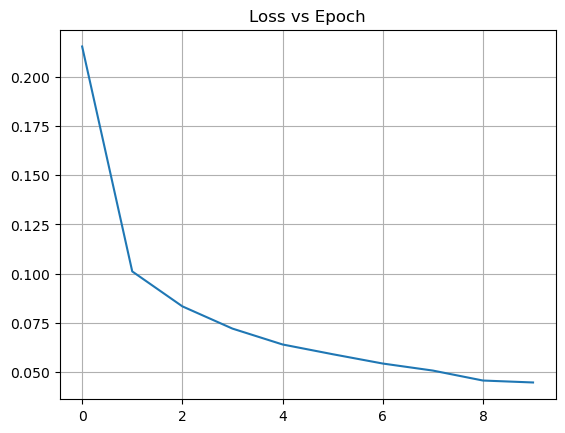

CPU times: user 41min 31s, sys: 1min 34s, total: 43min 6s
Wall time: 5min 23s


In [16]:
%%time

num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).long()

        optimizer.zero_grad()
        outputs = model(images)

        labels = labels.view(labels.shape[0])
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')
    Losses.append(running_loss/len(train_loader))
print('Finished Training')

plt.plot(range(num_epochs), Losses)
plt.grid()
plt.title("Loss vs Epoch")
plt.show()

Accuracy of the model on the test images: 97.88%

Classification Report:
              precision    recall  f1-score   support

           A       0.98      0.97      0.97      1506
           B       0.98      0.94      0.96       978
           C       0.98      0.99      0.98      2486
           D       0.96      0.93      0.94      1047
           E       0.99      0.97      0.98      1260
           F       0.97      0.98      0.97       266
           G       0.96      0.98      0.97       661
           H       0.92      0.96      0.94       789
           I       0.99      0.98      0.99       202
           J       0.95      0.98      0.96       894
           K       0.95      0.95      0.95       605
           L       0.99      0.97      0.98      1231
           M       0.99      0.98      0.98      1955
           N       0.96      0.99      0.97      1994
           O       0.98      0.99      0.99      5868
           P       0.98      0.99      0.99      2027
        

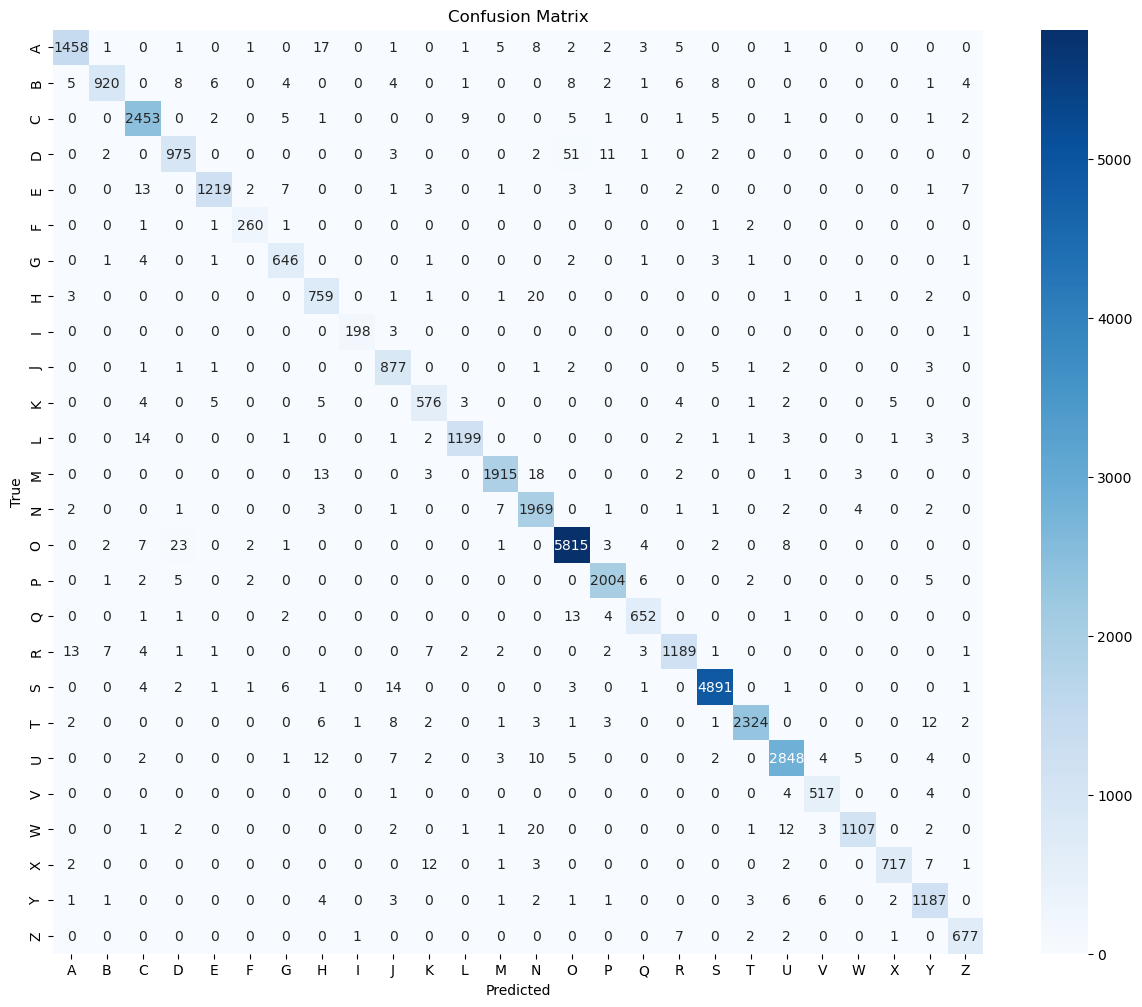

In [18]:
# Evaluating the model on test data

# Create a TensorDataset from tensors
test_dataset = TensorDataset(X_test, y_test)

# Create a DataLoader from the TensorDataset
test_loader = DataLoader(test_dataset, batch_size, shuffle=True)

model.eval()

# Initialize variables for accuracy calculation and predictions storage
correct = 0
total = 0
all_labels = []
all_predictions = []

# Evaluate the model
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device).long()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)

        labels = labels.view(labels.size(0))
        correct += (predicted == labels).sum().item()
        
        # Store all labels and predictions for confusion matrix and classification report
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Calculate accuracy
accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(all_labels, all_predictions)
class_report = classification_report(all_labels, all_predictions, target_names=[chr(i) for i in range(ord('A'), ord('Z')+1)])

# Print classification report
print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[chr(i) for i in range(ord('A'), ord('Z')+1)], yticklabels=[chr(i) for i in range(ord('A'), ord('Z')+1)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [20]:
# Saving the model
FILE = "Models/Letter_Classifier.pth"

torch.save(model.state_dict(), FILE)